# Adaboost ou XGBoost ?

Deux algorithmes de boosting connus sont Adaboost & XGBoost, voyons voir la performance de chacun de ces algorithmes sur le dataset d'AIRBNB Seattle. Notre but va être de prédire le prix d'un appartement en fonction des caractéristiques qu'on nous a donné. 

1. Importez les librairies usuelles 

In [153]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

2. Importez le dataset ```listings.csv```

In [154]:
df=pd.read_csv("listings.csv")

In [155]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


3. On a beaucoup de données dans ce dataset. Affichez toutes les colonnes du dataset

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

4. Révisons un peu Seaborn, affichez la distribution des prix dans le dataset 

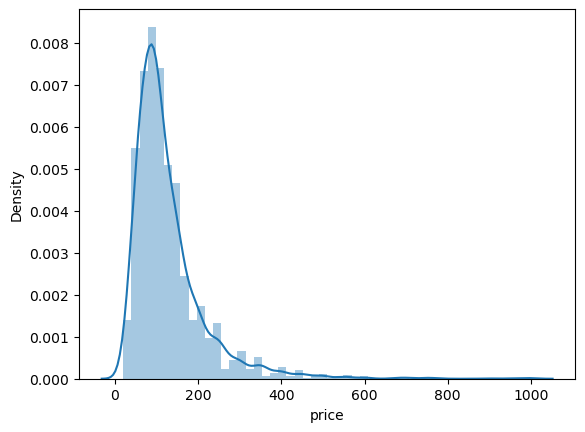

In [157]:
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

# afficher la distribution des prix avec Seaborn
sns.distplot(df['price'])

# afficher le graphique
plt.show()

5. Supprimez les outliers pour ne garder que les appartements qui ont un prix inférieur à 400$/nuit 

In [158]:
df = df[df.price < 400]
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.741000e+03,3.741000e+03,3.741000e+03,3739.000000,3739.000000,3741.000000,3741.000000,3741.000000,3725.000000,3735.000000,...,3112.000000,3101.000000,3106.000000,3101.000000,3108.000000,3104.000000,3103.000000,0.0,3741.000000,3131.00000
mean,5.554000e+06,2.016010e+13,1.580045e+07,7.159668,7.159668,47.628835,-122.332958,3.255547,1.230604,1.262115,...,94.515746,9.635279,9.553767,9.784908,9.807915,9.607603,9.452143,NaN,2.946004,2.10007
std,2.966467e+06,0.000000e+00,1.459317e+07,28.763187,28.763187,0.043323,0.031760,1.841565,0.548142,0.812395,...,6.592448,0.700346,0.799259,0.598798,0.571371,0.630123,0.749520,NaN,5.890650,1.82837
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.02000
25%,3.251069e+06,2.016010e+13,3.264544e+06,1.000000,1.000000,47.609070,-122.354142,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.71000
50%,6.119821e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623379,-122.328750,2.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.56000
75%,8.046691e+06,2.016010e+13,2.596372e+07,3.000000,3.000000,47.662995,-122.310725,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.03000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.15000


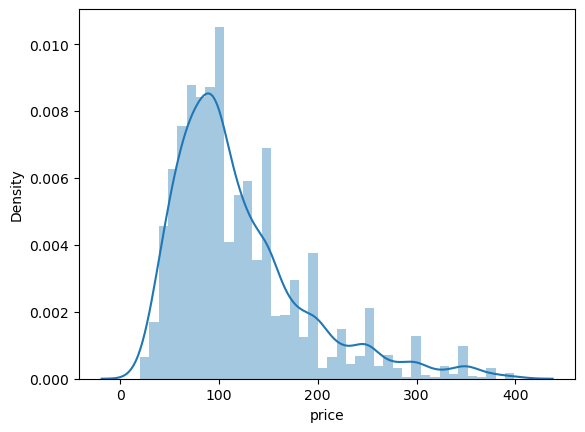

In [159]:
sns.distplot(df['price'])

# afficher le graphique
plt.show()

6. Exprimez le prix en fonction des variables suivantes : 

- ```room type```
- ```beds```
- ```property type```

<AxesSubplot:xlabel='room_type', ylabel='price'>

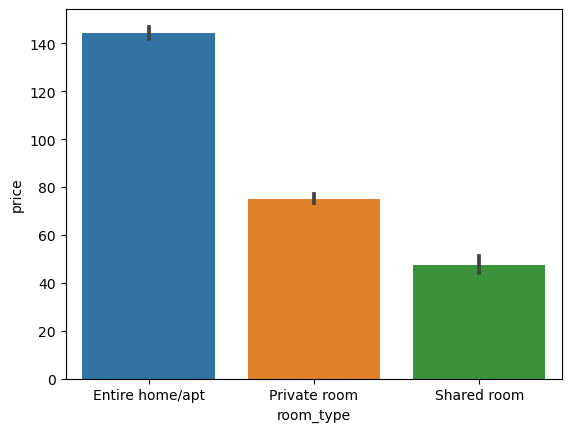

In [160]:
sns.barplot(x=df.room_type , y = df.price)

<AxesSubplot:xlabel='beds', ylabel='price'>

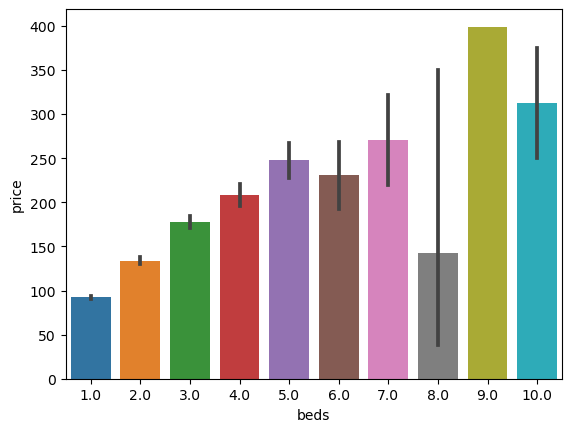

In [161]:
sns.barplot(x=df.beds , y = df.price)

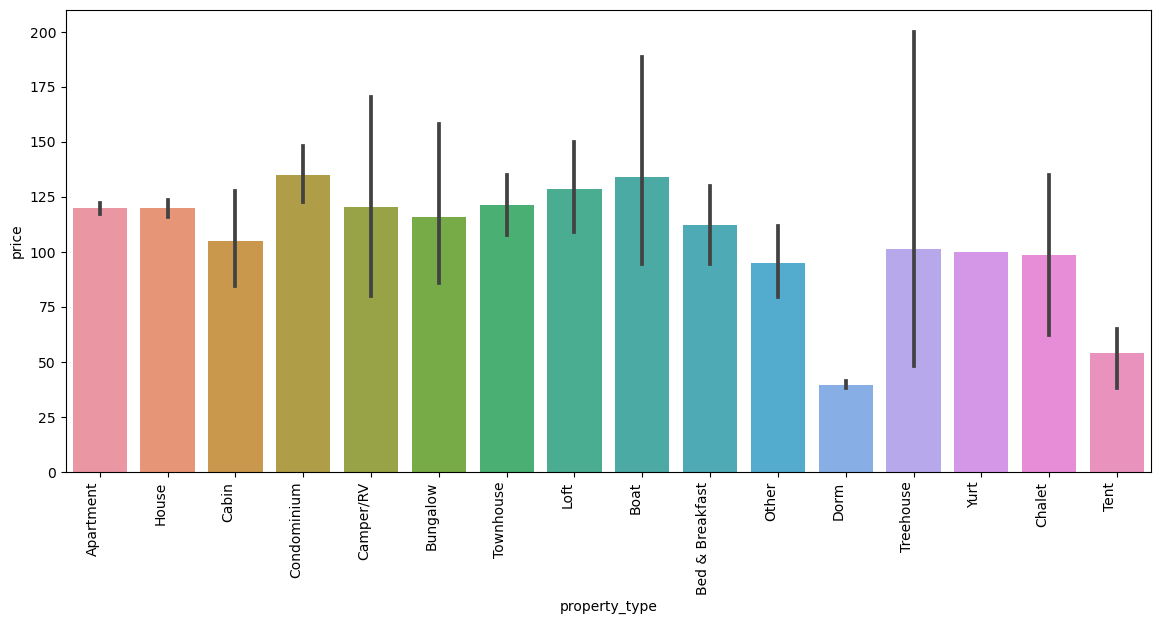

In [162]:
plt.figure(figsize=(14,6))
ax = sns.barplot(x=df.property_type, y=df.price)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()


7. Séparez la variable cible de votre dataset

In [163]:
y = df['price']
X = df.drop('price',axis=1)

8. Il faut qu'on écrème quelques variables explicatives de notre jeu de données. Commencer par simplement enlever les variables qui expriment un ```id``` quelconque ou urls. On enlèvera également les variables qui contiennent des textes longs comme ```notes```

De la même manière, on enlèvera  toutes les variables qui décrivent le prix mensuel ou hebdomadaire comme  ```monthly price```

Votre dataset devrait contenir uniquement les variables catégoriques et numériques une fois votre nettoyage fait. 

A la fin, votre dataset contiendra les variables suivantes : 

```
Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'zipcode',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'square_feet',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'requires_license', 'license',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')
```

In [164]:
# Liste des colonnes à enlever
columns_to_remove = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 
                     'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 
                     'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 
                     'host_since', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 
                     'street', 'neighbourhood', 'city', 'state', 'smart_location', 'country_code', 
                     'country','is_location_exact', 'license','calendar_last_scraped', 
                     'first_review', 'last_review', 'weekly_price', 'monthly_price', 'host_verifications', 
                     'jurisdiction_names']

# Suppression des colonnes
df = df.drop(columns_to_remove, axis=1)

In [165]:
# Liste des colonnes à conserver
columns_to_keep = ['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 
                   'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic',
                   'host_identity_verified', 'neighbourhood_group_cleansed', 'zipcode','latitude', 'longitude', 'property_type', 'room_type', 
                   'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'square_feet','security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 
                   'minimum_nights', 'maximum_nights', 'calendar_updated', 'has_availability', 'availability_30', 
                   'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 
                   'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
                   'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
                   'review_scores_value', 'requires_license', 'instant_bookable', 'cancellation_policy', 
                   'require_guest_profile_picture', 'require_guest_phone_verification', 
                   'calculated_host_listings_count', 'reviews_per_month']

# Suppression des colonnes à enlever
df = df[columns_to_keep]


In [166]:
print(df.columns)

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'zipcode',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'square_feet',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'requires_license', 'instant_bookable',
       'cancellation_policy', 'require_guest_p

9. Gérez les valeurs NaN. Utilisez les stratégies que vous préférez 

In [167]:
print(df.isna().any())

host_response_time                   True
host_response_rate                   True
host_acceptance_rate                 True
host_is_superhost                    True
host_neighbourhood                   True
host_listings_count                  True
host_total_listings_count            True
host_has_profile_pic                 True
host_identity_verified               True
neighbourhood_group_cleansed        False
zipcode                              True
latitude                            False
longitude                           False
property_type                        True
room_type                           False
accommodates                        False
bathrooms                            True
bedrooms                             True
beds                                 True
bed_type                            False
square_feet                          True
security_deposit                     True
cleaning_fee                         True
guests_included                   

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3741 entries, 0 to 3817
Data columns (total 48 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   host_response_time                3234 non-null   object 
 1   host_response_rate                3234 non-null   object 
 2   host_acceptance_rate              2997 non-null   object 
 3   host_is_superhost                 3739 non-null   object 
 4   host_neighbourhood                3446 non-null   object 
 5   host_listings_count               3739 non-null   float64
 6   host_total_listings_count         3739 non-null   float64
 7   host_has_profile_pic              3739 non-null   object 
 8   host_identity_verified            3739 non-null   object 
 9   neighbourhood_group_cleansed      3741 non-null   object 
 10  zipcode                           3734 non-null   object 
 11  latitude                          3741 non-null   float64
 12  longit

10. Vérifiez que toutes les variables numériques le sont effectivement bien. (N'oubliez pas de regarder y)

In [169]:
num_vars = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_cols = list(df.select_dtypes(include=num_vars).columns)
for col in num_cols:
    if df[col].dtype != 'float64' and df[col].dtype != 'int64':
        print(f"La colonne {col} n'est pas numérique")
    else:
        print(f"La colonne {col} est numérique")


La colonne host_listings_count est numérique
La colonne host_total_listings_count est numérique
La colonne latitude est numérique
La colonne longitude est numérique
La colonne accommodates est numérique
La colonne bathrooms est numérique
La colonne bedrooms est numérique
La colonne beds est numérique
La colonne square_feet est numérique
La colonne guests_included est numérique
La colonne minimum_nights est numérique
La colonne maximum_nights est numérique
La colonne availability_30 est numérique
La colonne availability_60 est numérique
La colonne availability_90 est numérique
La colonne availability_365 est numérique
La colonne number_of_reviews est numérique
La colonne review_scores_rating est numérique
La colonne review_scores_accuracy est numérique
La colonne review_scores_cleanliness est numérique
La colonne review_scores_checkin est numérique
La colonne review_scores_communication est numérique
La colonne review_scores_location est numérique
La colonne review_scores_value est numé

11. Faites votre dernière partie de preprocessing en dummyfiant les variables catégoriques 

In [170]:
# Dummification des variables catégoriques
cat_vars = ['host_response_time', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 'bed_type', 'cancellation_policy']
for var in cat_vars:
    cat_list = 'var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var, drop_first=True)
    df = df.join(cat_list)

# Suppression des variables catégoriques originales
df = df.drop(cat_vars, axis=1)


12. Faites maintenant un ```train_test_split```

In [ ]:
from sklearn.model_selection import train_test_split
X = df
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

13. Normalisez ```X_train``` & ```X_test```

In [ ]:
from sklearn.model_selection import train_test_split
X = df
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


14. Entrainez d'abord un modèle d'Adaboost standard et regardez votre score 

In [ ]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)
y_train = pd.cut(y_train, bins=5, labels=[0, 1, 2, 3, 4])
y_test = pd.cut(y_test, bins=5, labels=[0, 1, 2, 3, 4])
# Importer AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Créer une instance de AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)

# Entraîner le modèle sur les données d'entraînement
adaboost.fit(X_train_preprocessed, y_train)
y_pred = adaboost.predict(X_test_preprocessed)
# Évaluer les performances du modèle
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.39617619127209813

15. Entrainez ensuite un modèle XGBoost et regardez votre score 

In [ ]:
from xgboost import XGBClassifier

# Create an XGBClassifier with CPU acceleration
xgb = XGBClassifier(tree_method='hist')

# Train the model and make predictions
xgb.fit(X_train_preprocessed, y_train)
y_pred = xgb.predict(X_test_preprocessed)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

0.6281307244443659

16. Par défaut, Adaboost prend des decision trees comme modèle a booster. Tentez de mettre une regression linéaire 

In [ ]:
# Créer une instance de AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)

# Entraîner le modèle sur les données d'entraînement
adaboost.fit(X_train_preprocessed, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-2.1943458198312368e+17

17. La régression linéaire n'était pas la meilleure idée mais peut être qu'on peut faire une grid_search sur le ```learning rate``` & ```n_estimators```pour rattraper le score de XGBoost ?

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Create an instance of the AdaBoostClassifier
adaboost = AdaBoostClassifier()

# Define the parameter grid to search over
param_grid = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.1, 0.5, 1.0]}

# Create a grid search object with cross-validation
grid_search = GridSearchCV(adaboost, param_grid=param_grid, cv=5)

# Train the grid search object on the preprocessed training data
grid_search.fit(X_train_preprocessed, y_train)

# Print the best hyperparameters found by grid search
print("Best hyperparameters: ", grid_search.best_params_)

# Get the best classifier from grid search
best_classifier = grid_search.best_estimator_


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [40, 50, 70, 100, 150, 200], 'learning_rate': [1.0, 0.9, 0.8, 0.7, 0.6, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [ ]:
y_pred = adaboost.predict(X_test_preprocessed)

{'learning_rate': 1.0, 'n_estimators': 200}

In [ ]:
# Évaluer les performances du modèle
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.49078434974719043